<a href="https://colab.research.google.com/github/sofiahanim/diabetespredictionregressionclassification/blob/main/Diabetes_Prediction_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
install.packages("corrplot")
library(corrplot)

# Load the dataset
data <- read.csv("diabetesprojectdata.csv")

# Glimpse of the data
glimpse(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …


**Summary Statistics**

In [ ]:
# Summary statistics for all variables
data %>%
  summarise(across(everything(), list(mean = mean, sd = sd, min = min, max = max), na.rm = TRUE))

Pregnancies_mean,Pregnancies_sd,Pregnancies_min,Pregnancies_max,Glucose_mean,Glucose_sd,Glucose_min,Glucose_max,BloodPressure_mean,BloodPressure_sd,⋯,DiabetesPedigreeFunction_min,DiabetesPedigreeFunction_max,Age_mean,Age_sd,Age_min,Age_max,Outcome_mean,Outcome_sd,Outcome_min,Outcome_max
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
3.845052,3.369578,0,17,120.8945,31.97262,0,199,69.10547,19.35581,⋯,0.078,2.42,33.24089,11.76023,21,81,0.3489583,0.4769514,0,1


**Missing Value Analysis**

In [ ]:
# Check for missing values
data %>%
  summarise(across(everything(), ~sum(is.na(.))))

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


**Distribution of Variables**

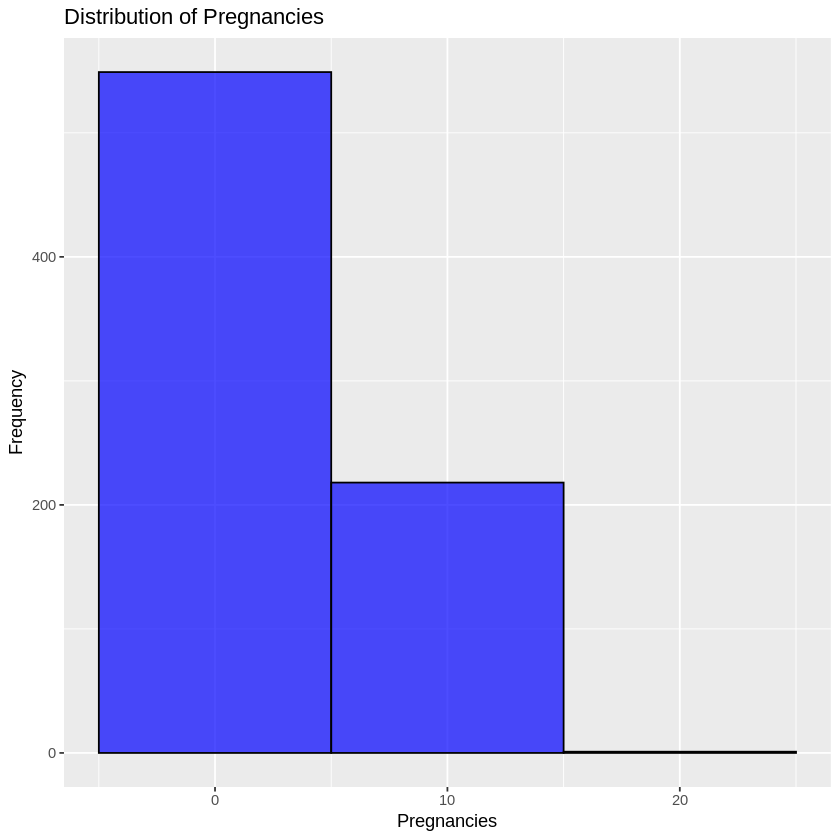

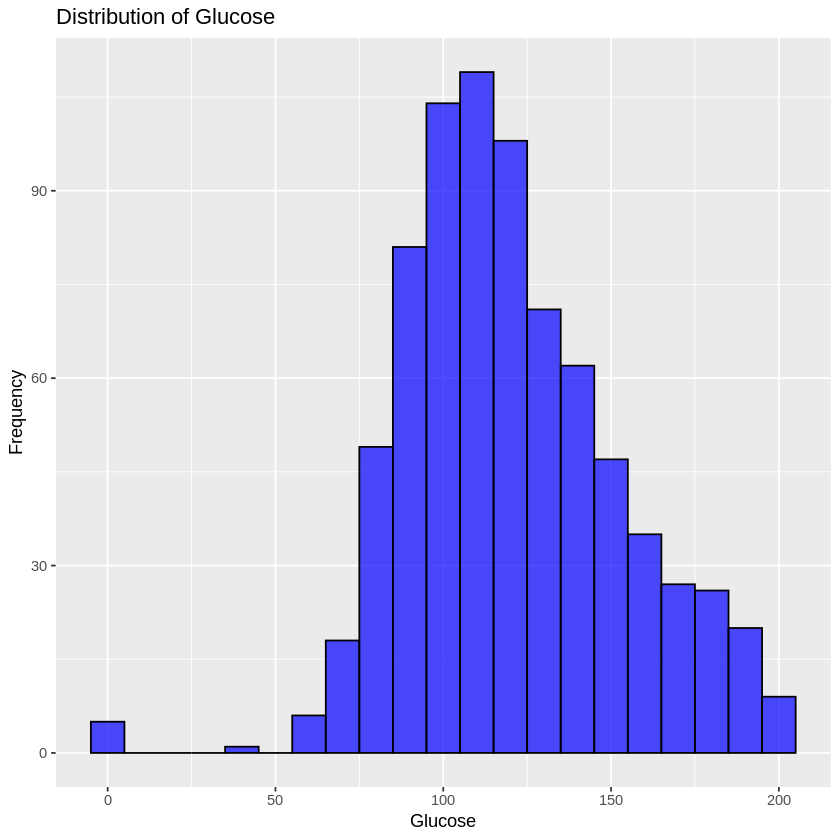

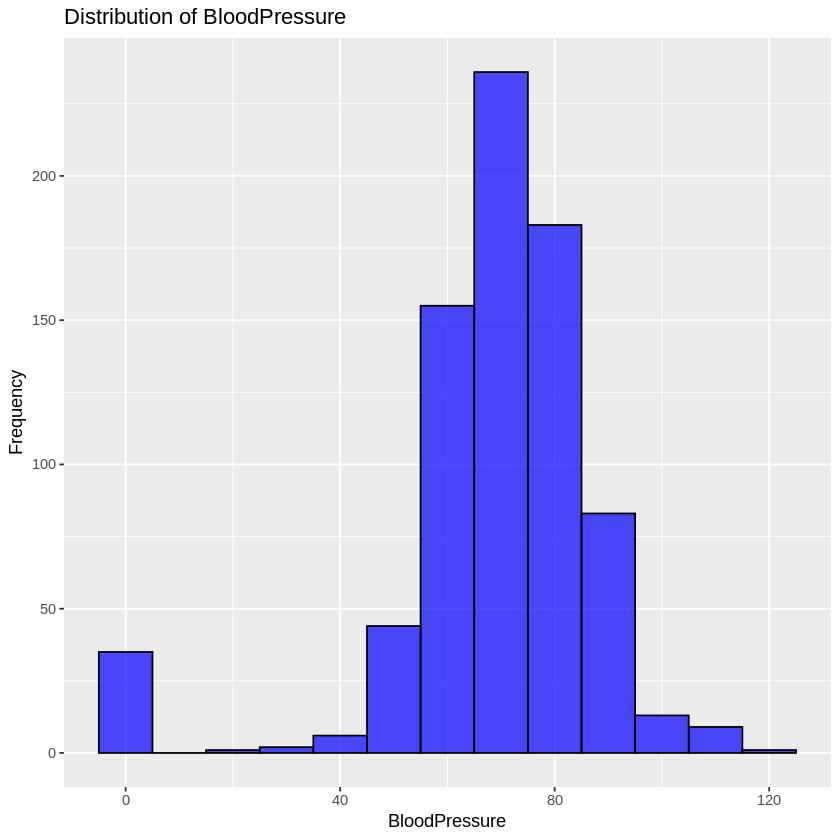

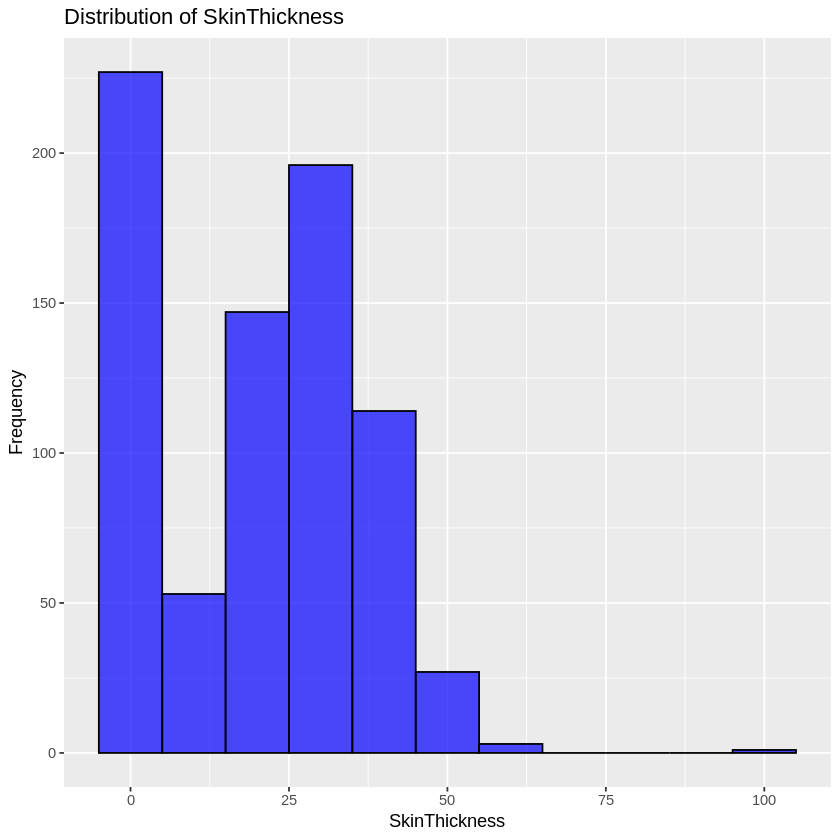

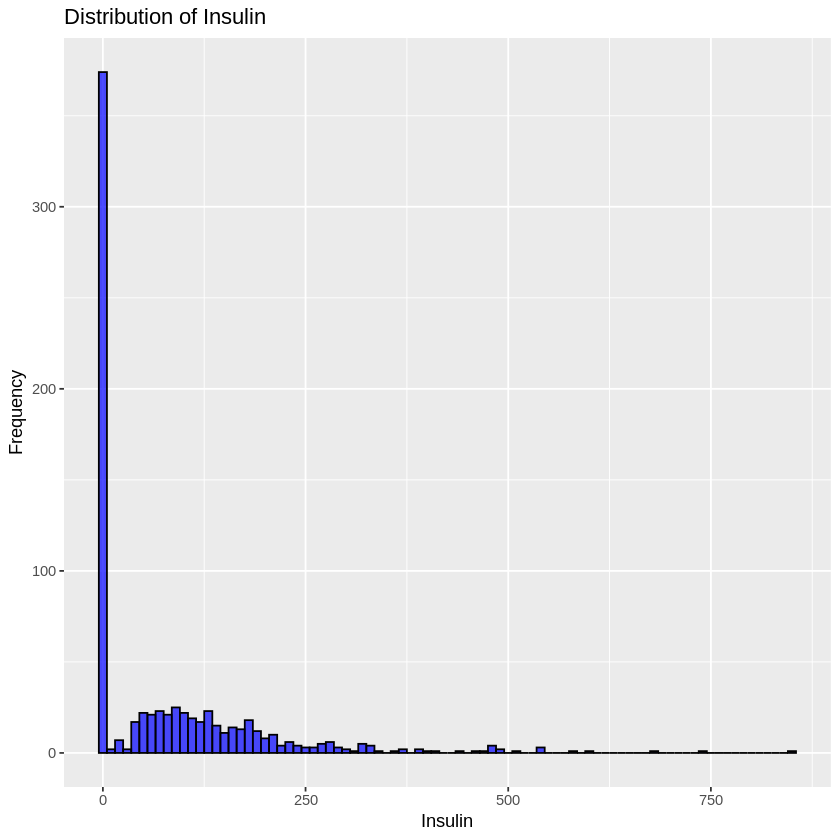

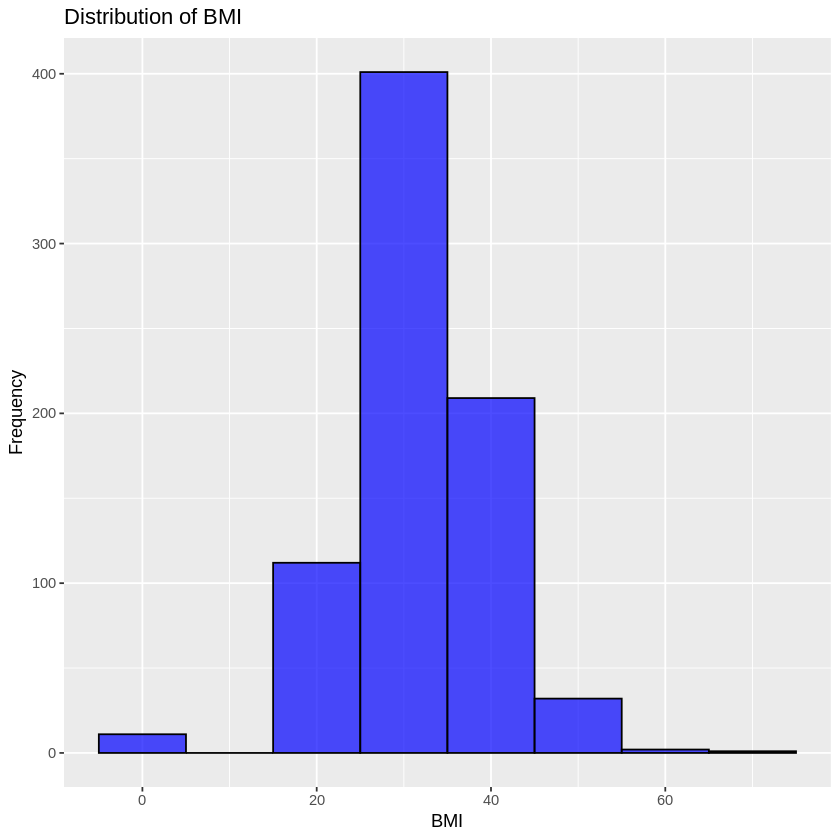

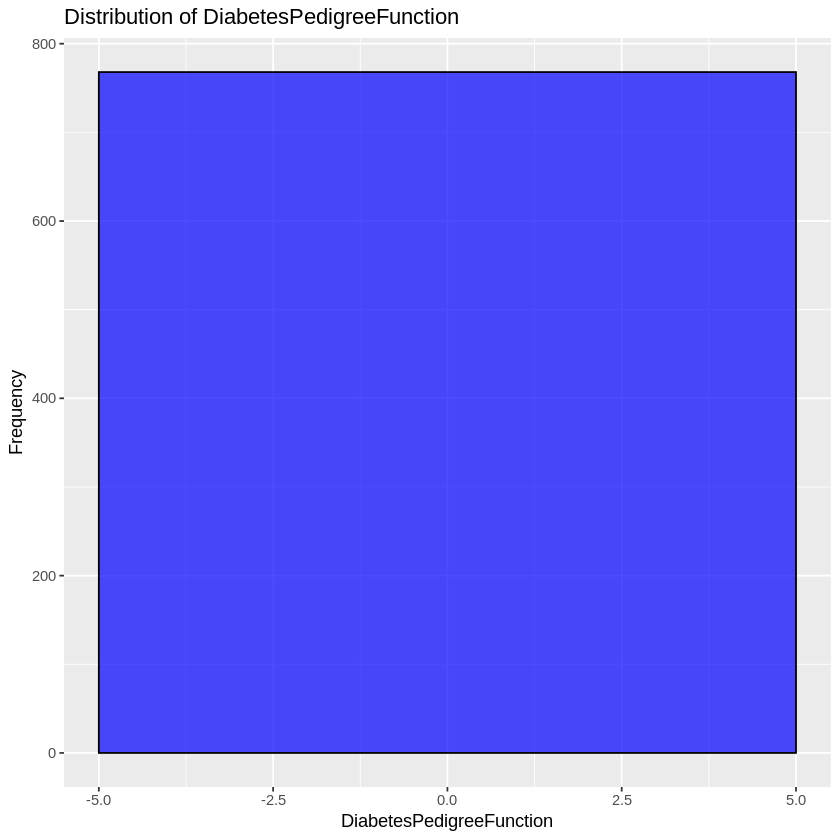

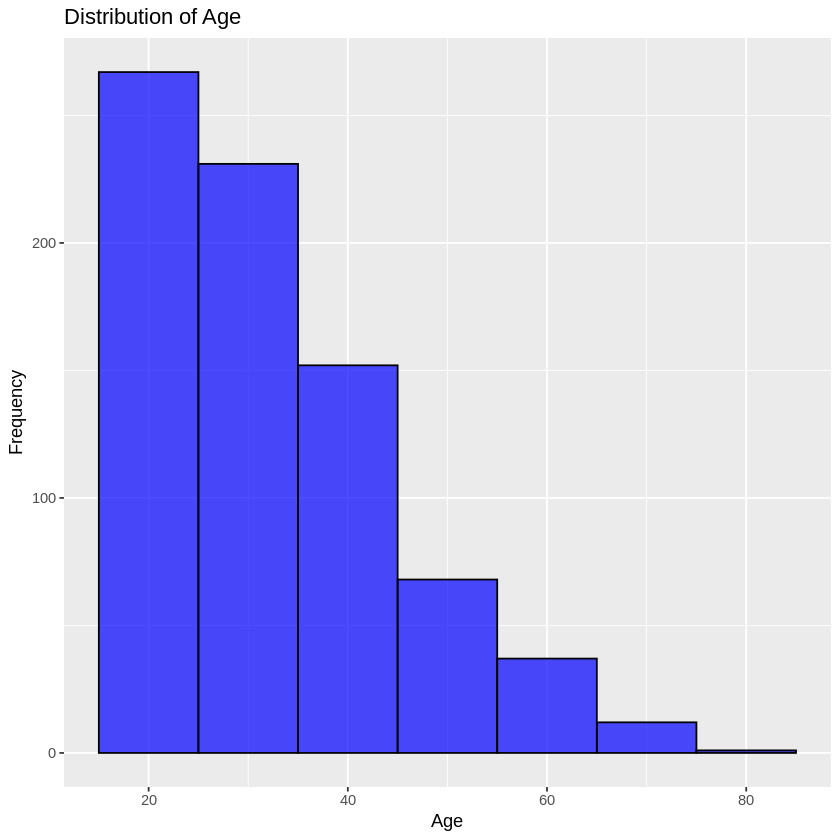

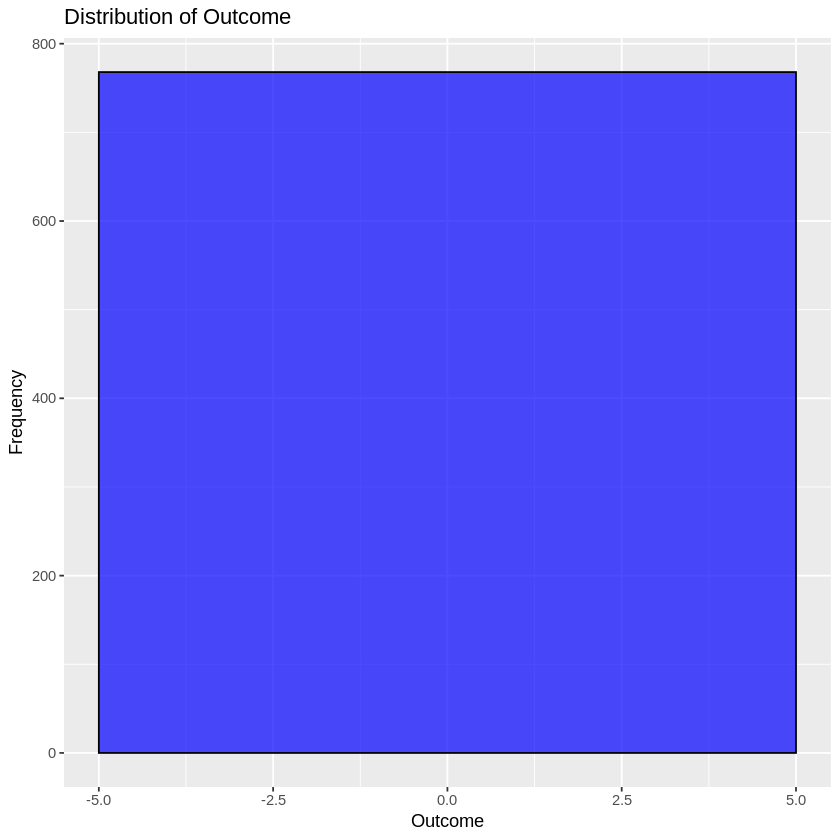

In [ ]:
# Histogram for numerical variables
numeric_cols <- colnames(data)[sapply(data, is.numeric)]
for (col in numeric_cols) {
  print(
    ggplot(data, aes_string(x = col)) +
      geom_histogram(binwidth = 10, fill = "blue", color = "black", alpha = 0.7) +
      labs(title = paste("Distribution of", col), x = col, y = "Frequency")
  )
}

**Correlation Analysis**

                         Pregnancies    Glucose BloodPressure SkinThickness
Pregnancies               1.00000000 0.12945867    0.14128198   -0.08167177
Glucose                   0.12945867 1.00000000    0.15258959    0.05732789
BloodPressure             0.14128198 0.15258959    1.00000000    0.20737054
SkinThickness            -0.08167177 0.05732789    0.20737054    1.00000000
Insulin                  -0.07353461 0.33135711    0.08893338    0.43678257
BMI                       0.01768309 0.22107107    0.28180529    0.39257320
DiabetesPedigreeFunction -0.03352267 0.13733730    0.04126495    0.18392757
Age                       0.54434123 0.26351432    0.23952795   -0.11397026
Outcome                   0.22189815 0.46658140    0.06506836    0.07475223
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.07353461 0.01768309              -0.03352267
Glucose                   0.33135711 0.22107107               0.13733730
BloodPressure        

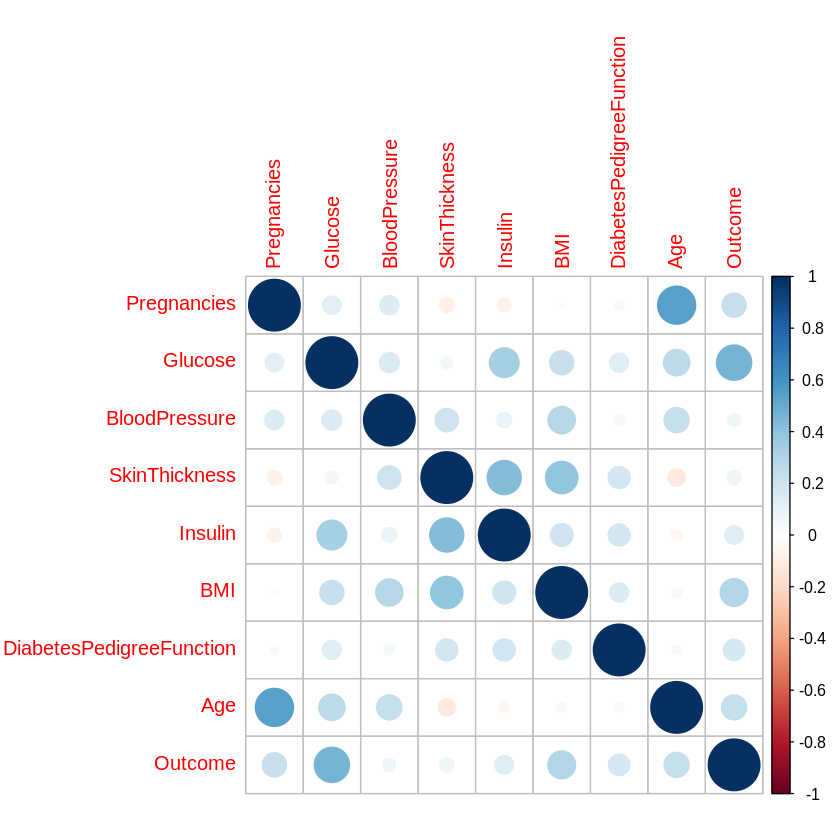

In [ ]:
# Correlation matrix
cor_matrix <- cor(data %>% select_if(is.numeric), use = "complete.obs")
print(cor_matrix)

# Visualize correlations
library(corrplot)
corrplot::corrplot(cor_matrix, method = "circle")

**Outcome Analysis**

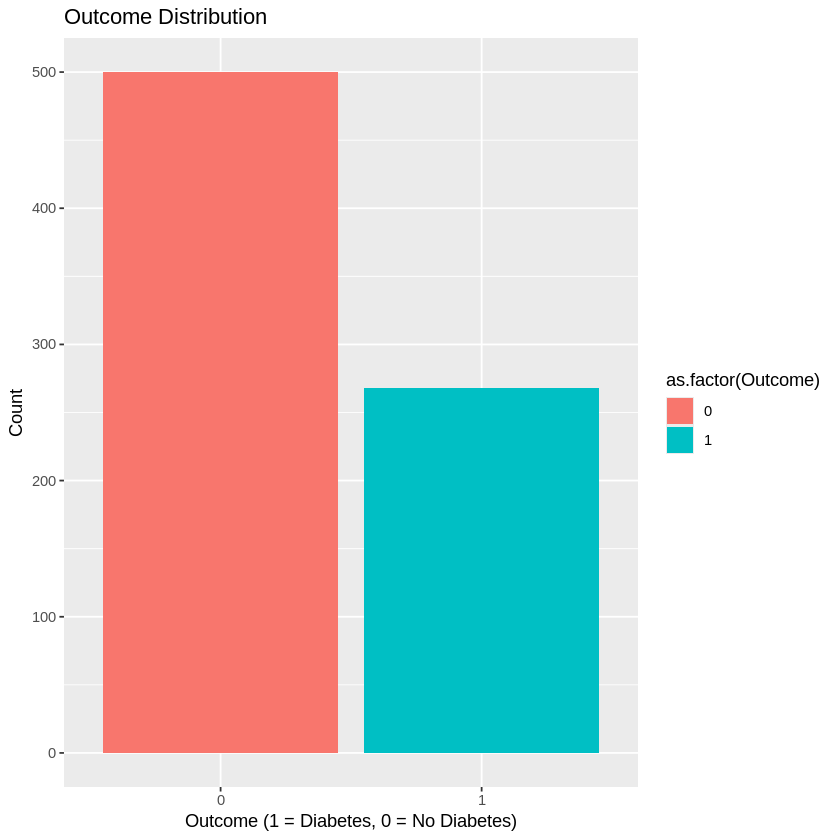

In [ ]:
# Distribution of Outcome variable
data %>%
  group_by(Outcome) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = as.factor(Outcome), y = Count, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity") +
  labs(title = "Outcome Distribution", x = "Outcome (1 = Diabetes, 0 = No Diabetes)", y = "Count")

**Relationships Between Variables**

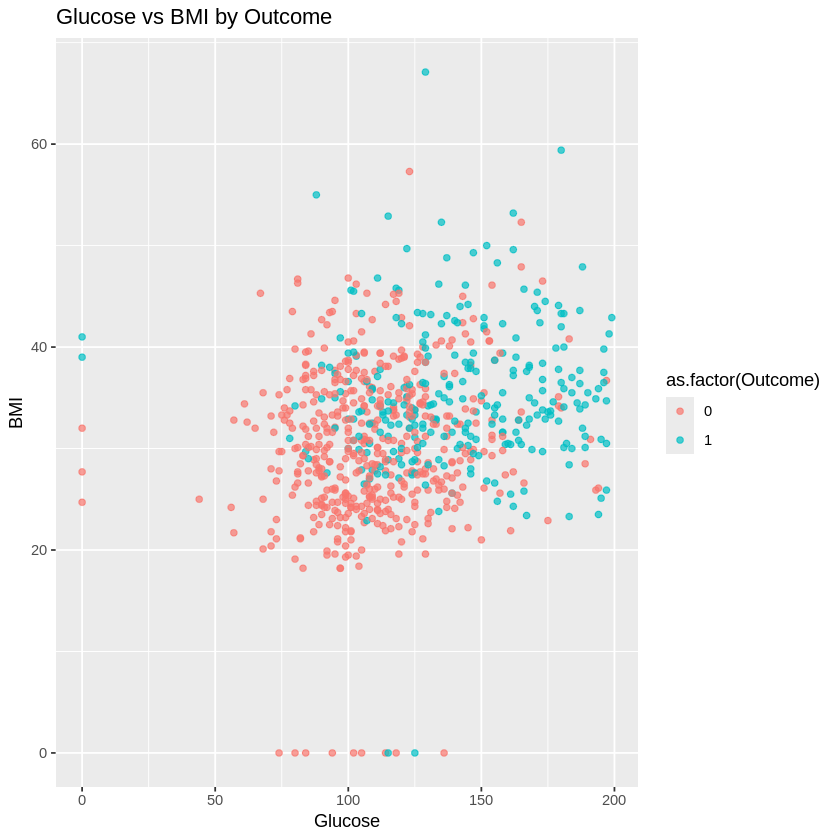

In [ ]:
# Scatter plot between Glucose and BMI grouped by Outcome
ggplot(data, aes(x = Glucose, y = BMI, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  labs(title = "Glucose vs BMI by Outcome", x = "Glucose", y = "BMI")

**Age Group Analysis**

`summarise()` has grouped output by 'AgeGroup'. You can override using the
`.groups` argument.


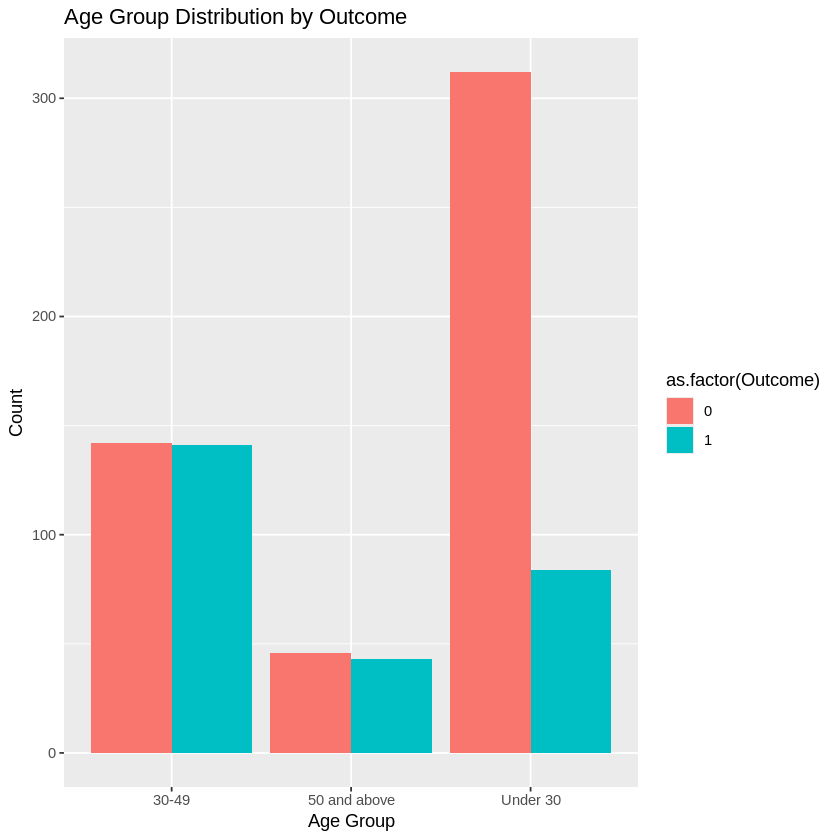

In [ ]:
# Categorize Age into groups
data <- data %>%
  mutate(AgeGroup = case_when(
    Age < 30 ~ "Under 30",
    Age >= 30 & Age < 50 ~ "30-49",
    Age >= 50 ~ "50 and above"
  ))

# Age group distribution by Outcome
data %>%
  group_by(AgeGroup, Outcome) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = AgeGroup, y = Count, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Age Group Distribution by Outcome", x = "Age Group", y = "Count")

# Modelling

## Classification Modelling

Split test train

In [ ]:
install.packages("caret")
library(caret)

set.seed(123)
trainIndex <- createDataPartition(data$Outcome, p = 0.8, list = FALSE)

# Create training and testing sets
train <- data[trainIndex, ]
test <- data[-trainIndex, ]

# Convert Outcome to factor
train$Outcome <- as.factor(train$Outcome)
test$Outcome <- as.factor(test$Outcome)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



### Logistic Regression

In [ ]:
logistic_model <- glm(Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure, data = train, family = binomial)

# Model summary
summary(logistic_model)

# Predict probabilities and classes
predicted_probs <- predict(logistic_model, newdata = test, type = "response")
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + 
    BloodPressure, family = binomial, data = train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.781487   0.730083 -10.658  < 2e-16 ***
Pregnancies               0.148092   0.031149   4.754 1.99e-06 ***
Glucose                   0.034966   0.003868   9.041  < 2e-16 ***
BMI                       0.081138   0.015726   5.159 2.48e-07 ***
DiabetesPedigreeFunction  0.766364   0.316109   2.424   0.0153 *  
BloodPressure            -0.011987   0.005542  -2.163   0.0305 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 797.28  on 614  degrees of freedom
Residual deviance: 587.34  on 609  degrees of freedom
AIC: 599.34

Number of Fisher Scoring iterations: 5


### Support Vector Machine (SVM)

In [ ]:
library(e1071)

svm_model <- svm(Outcome ~  Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure, data=train, kernel='radial', probability= TRUE)

#Model summary
summary(svm_model)

svm_predictions <- predict(svm_model, newdata = test, probability = TRUE)


Call:
svm(formula = Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + 
    BloodPressure, data = train, kernel = "radial", probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  347

 ( 177 170 )


Number of Classes:  2 

Levels: 
 0 1




### Naive Bayes

In [ ]:
nb_model <- naiveBayes(Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure, data = train)

#Model summary
summary(nb_model)

nb_predictions <- predict(nb_model, newdata = test)

          Length Class  Mode     
apriori   2      table  numeric  
tables    5      -none- list     
levels    2      -none- character
isnumeric 5      -none- logical  
call      4      -none- call     

### XGBoost

In [ ]:
install.packages("xgboost")
library(xgboost)

# Convert outcome to numeric for xgboost
train$Outcome <- as.numeric(as.character(train$Outcome))
test$Outcome <- as.numeric(as.character(test$Outcome))

# Create xgboost matrix
xgb_train <- xgb.DMatrix(data = as.matrix(train[, -9]), label = train$Outcome)
xgb_test <- xgb.DMatrix(data = as.matrix(test[, -9]), label = test$Outcome)

# Set parameters for xgboost model
params <- list(
  booster = "gbtree",
  objective = "binary:logistic",
  eval_metric = "logloss",
  eta = 0.1,
  max_depth = 6,
  nthread = 2
)

# Train xgboost model
xgb_model <- xgb.train(
  params = params,
  data = xgb_train,
  nrounds = 100,
  watchlist = list(train = xgb_train, test = xgb_test),
  print_every_n = 10,
  early_stopping_rounds = 10
)

# Predict on test data
xgb_predictions <- predict(xgb_model, xgb_test)

# Convert predictions to classes (0 or 1)
xgb_predicted_classes <- ifelse(xgb_predictions > 0.5, 1, 0)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




[1]	train-logloss:0.646729	test-logloss:0.661563 
Multiple eval metrics are present. Will use test_logloss for early stopping.
Will train until test_logloss hasn't improved in 10 rounds.

[11]	train-logloss:0.385000	test-logloss:0.532830 
[21]	train-logloss:0.287240	test-logloss:0.505569 
[31]	train-logloss:0.239002	test-logloss:0.493450 
[41]	train-logloss:0.204665	test-logloss:0.491243 
[51]	train-logloss:0.179619	test-logloss:0.491507 
Stopping. Best iteration:
[46]	train-logloss:0.190553	test-logloss:0.486134



## Regression Modelling

To carry out regression modelling, using the same dataset, 'BMI' is chosen to be the target variable.

The regression models chosen to explore with are Linear Regression, Random Forest and XGBoost

Train-test split

In [ ]:
# Select the features and target variable
# We will predict BMI using other features
dataReg <- subset(data, select = -c(Outcome)) # Exclude the binary outcome column

# Split the data into training and testing sets
set.seed(123)  # For reproducibility
trainIndex <- createDataPartition(dataReg$BMI, p = 0.8, list = FALSE)
trainData <- dataReg[trainIndex, ]
testData <- dataReg[-trainIndex, ]



In [ ]:
# Install package
install.packages("randomForest")
# Load the package
library(randomForest)

### Linear Regression

In [ ]:
# Train a linear regression model
lm_model <- train(BMI ~ ., data = trainData, method = "lm")

# View the model summaries
cat("Linear Regression Summary:\n")
summary(lm_model$finalModel)


# Make predictions on the test set
lm_pred <- predict(lm_model, newdata = testData)

### Random Forest

In [ ]:
# Train a random forest regression model
rf_model <- train(BMI ~ ., data = trainData, method = "rf",
                  tuneGrid = expand.grid(.mtry = seq(2, ncol(trainData) - 1, by = 1)),
                  trControl = trainControl(method = "cv", number = 5))



cat("\nRandom Forest Model Parameters:\n")
print(rf_model$bestTune)

rf_pred <- predict(rf_model, newdata = testData)


### XGBoost

In [ ]:
# Train an XGBoost regression model
xgb_model <- train(BMI ~ ., data = trainData, method = "xgbLinear",
                   tuneGrid = expand.grid(.nrounds = seq(50, 200, by = 50),
                                          .lambda = c(0, 0.1, 1),
                                          .alpha = c(0, 0.1, 1),
                                          .eta = c(0.01, 0.1, 0.3)),
                   trControl = trainControl(method = "cv", number = 5))

cat("\nXGBoost Model Best Parameters:\n")
print(xgb_model$bestTune)


xgb_pred <- predict(xgb_model, newdata = testData)